### Task3 Exploratory Data Analysis -Retail 
We will introduce two types of EDA
1. Auto EDA
2. Bespoke EDA 

### Author: Ali Hassan

### Auto EDA

                                             |                                                                …


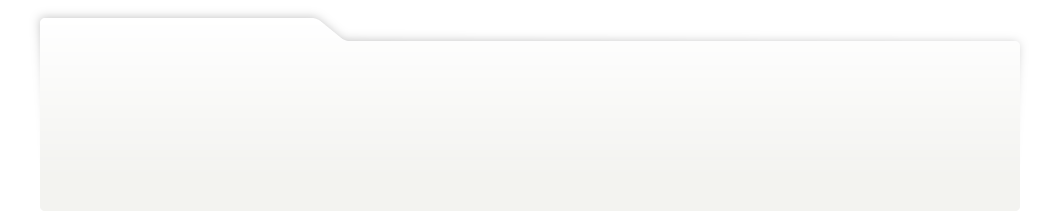
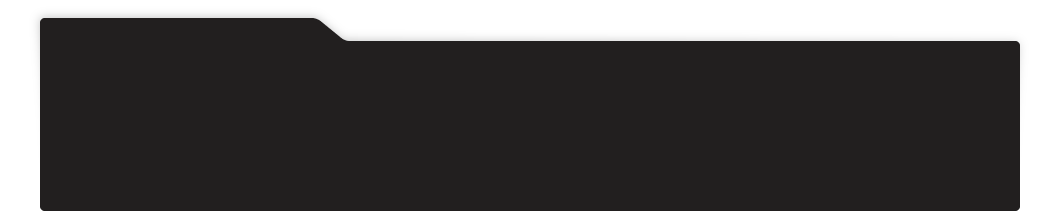
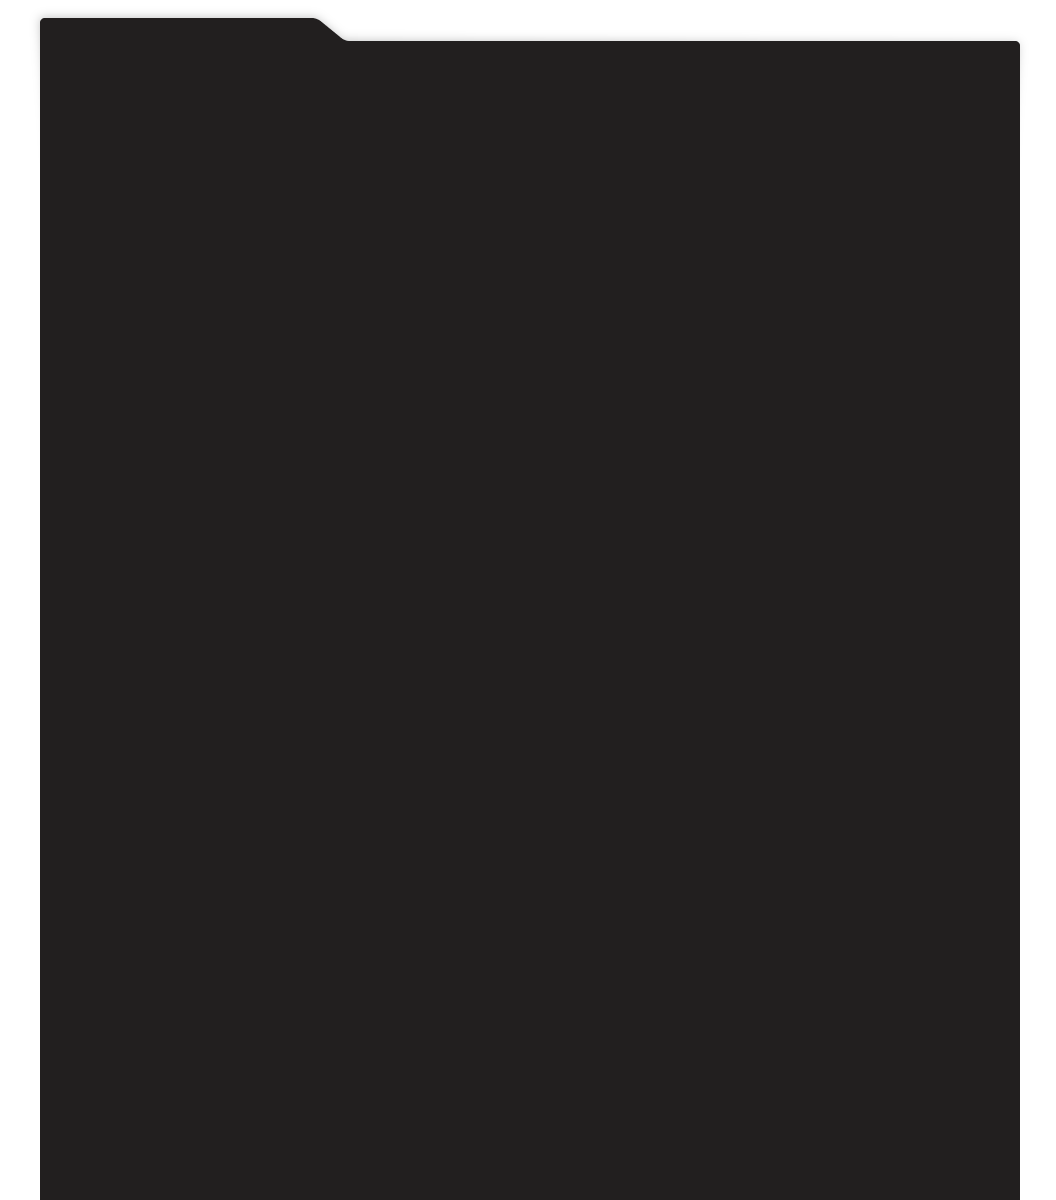
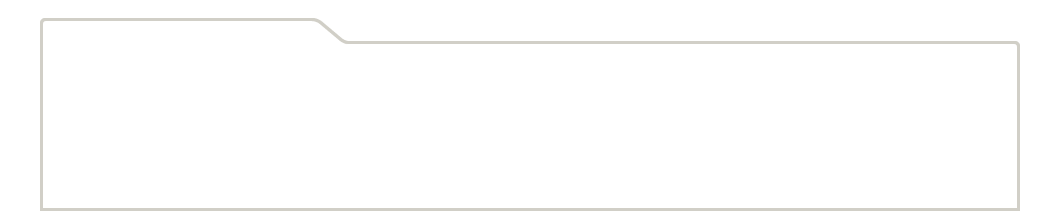
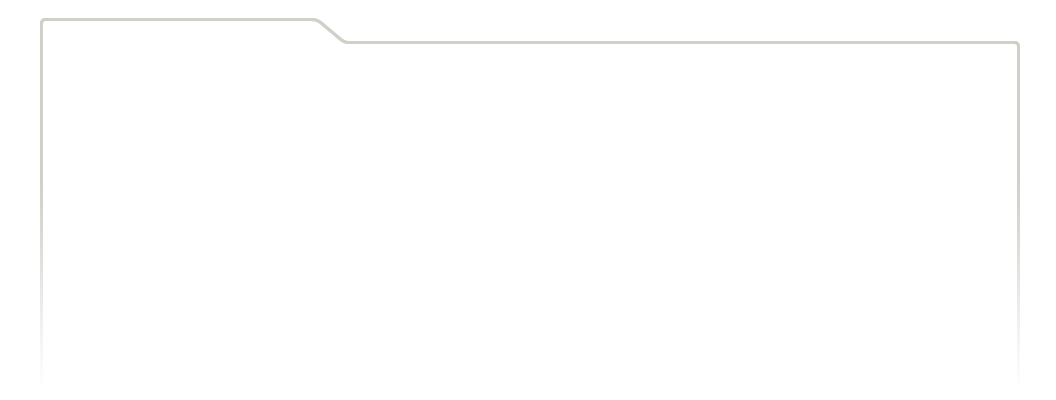
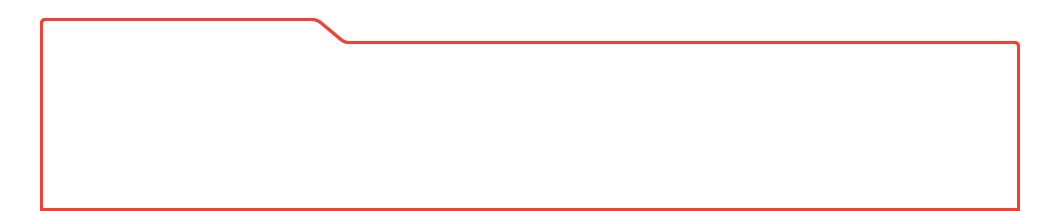
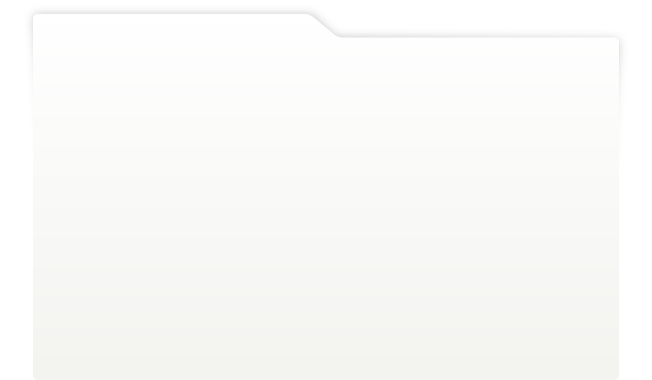
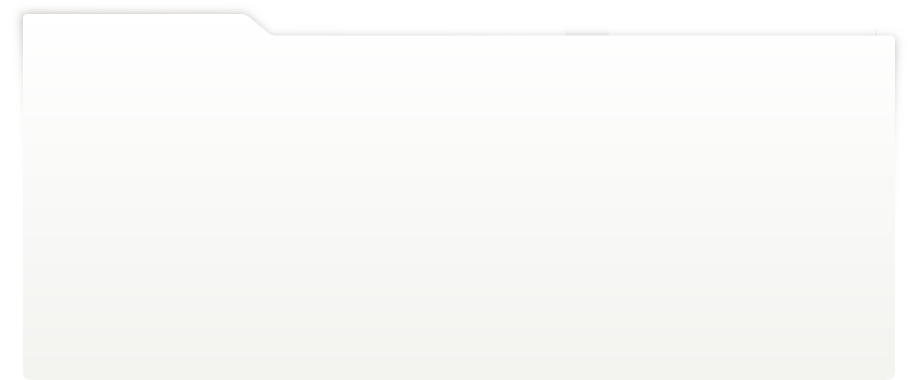
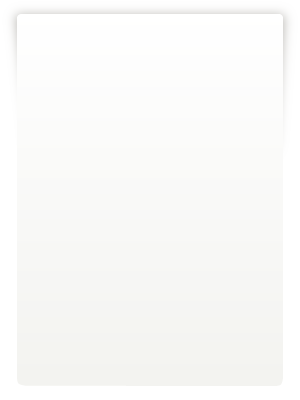
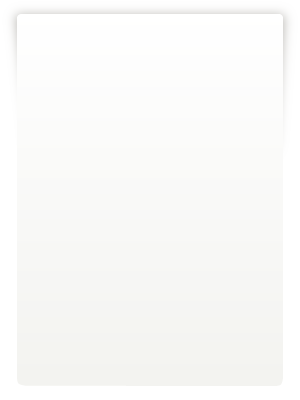
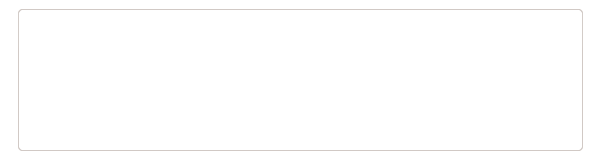
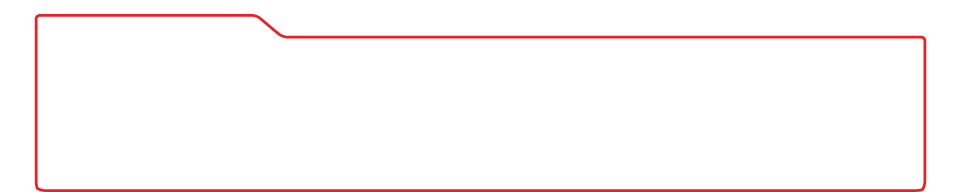
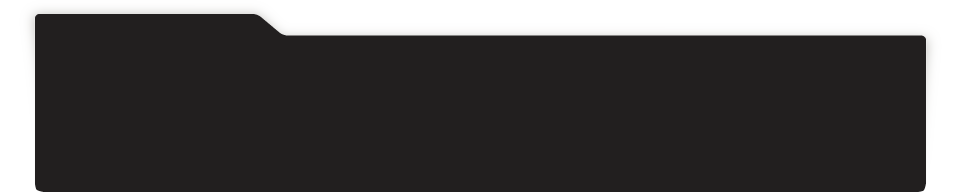
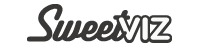
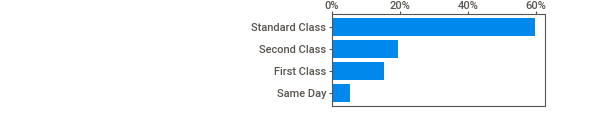
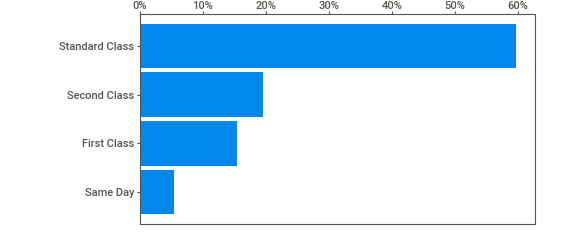
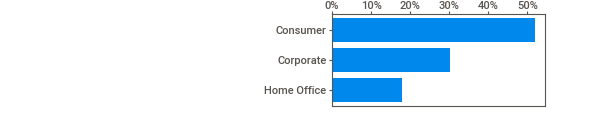
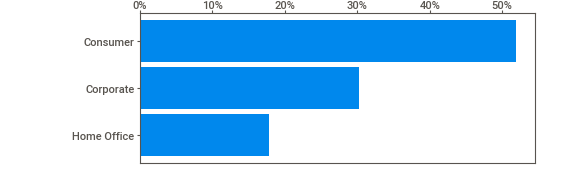
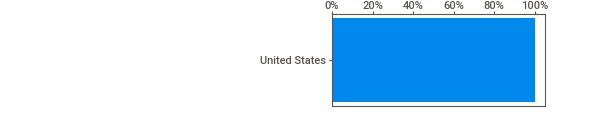
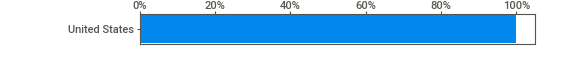
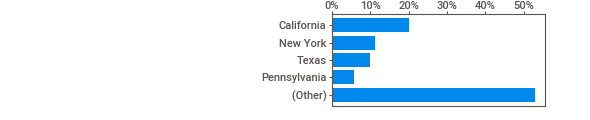
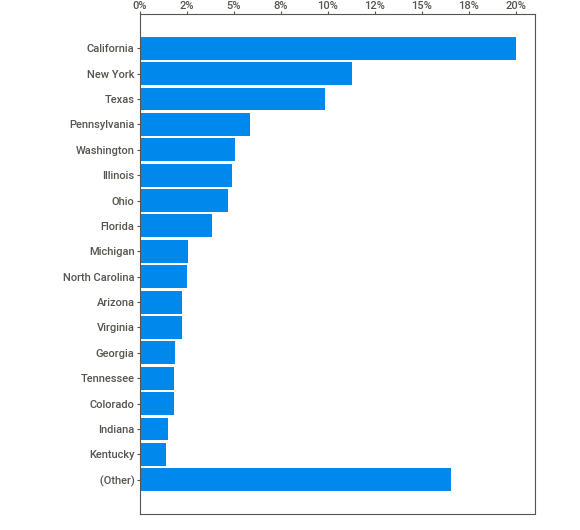
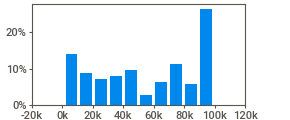
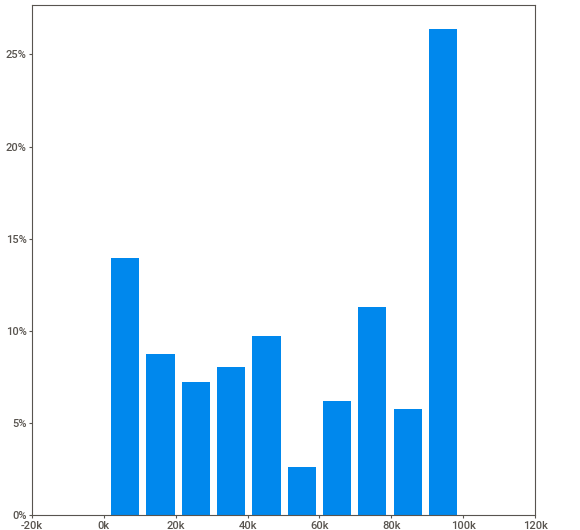
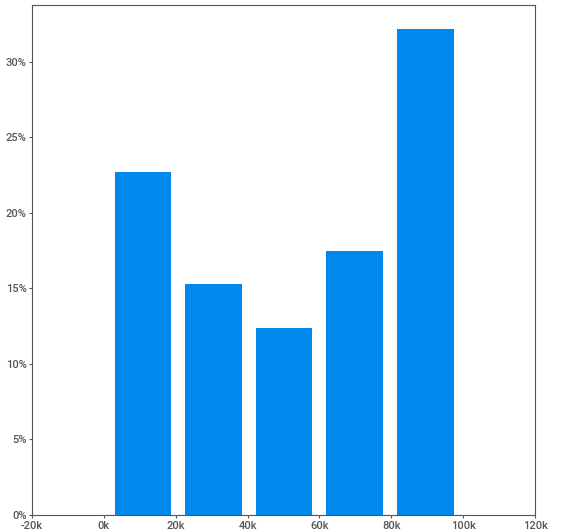
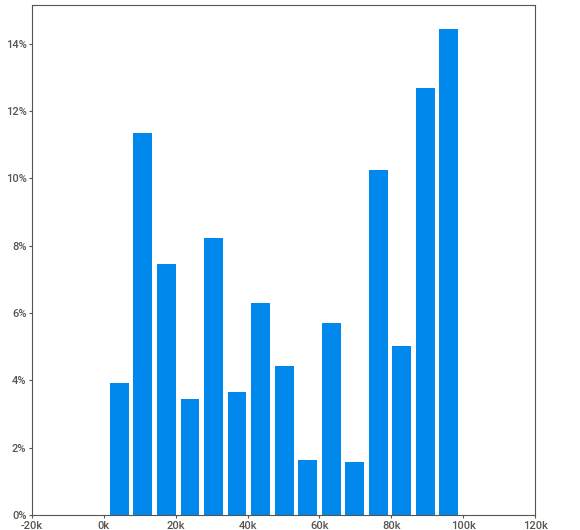
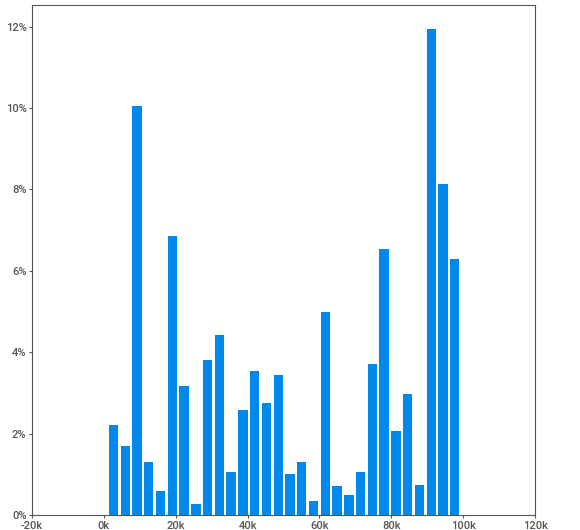
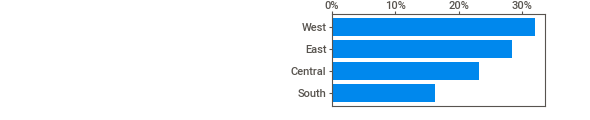
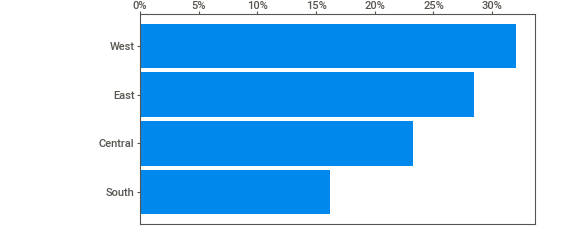
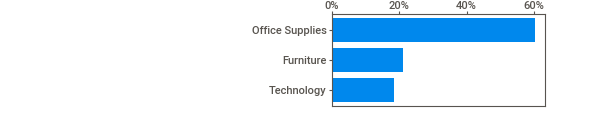
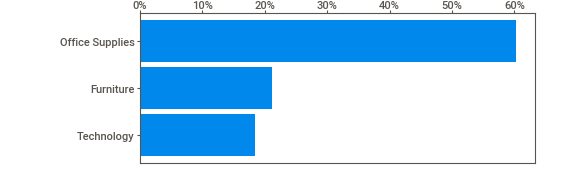
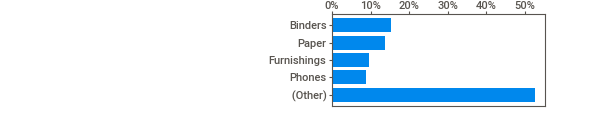
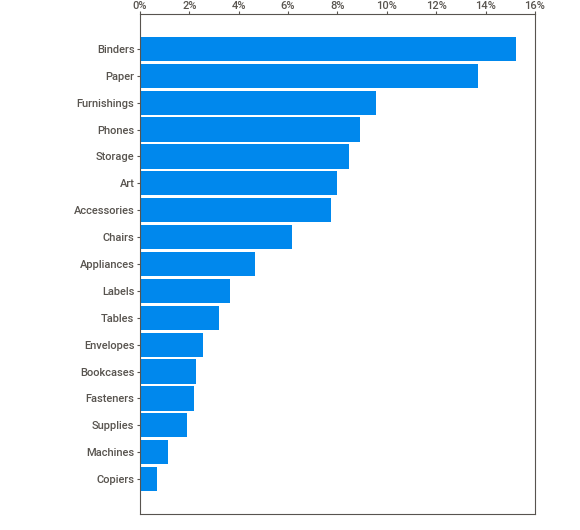
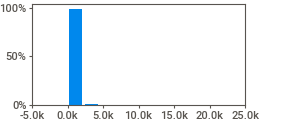
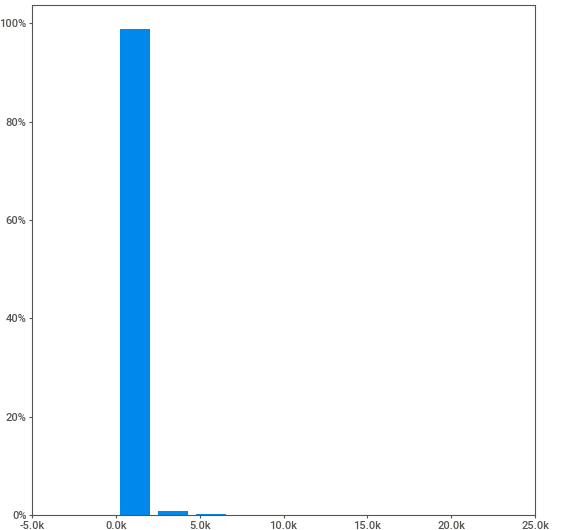
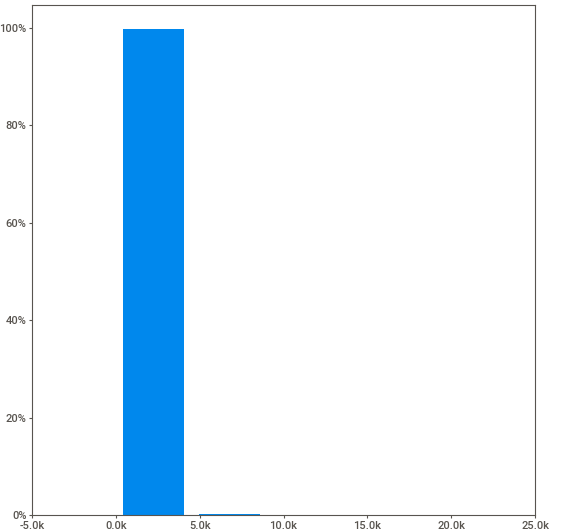
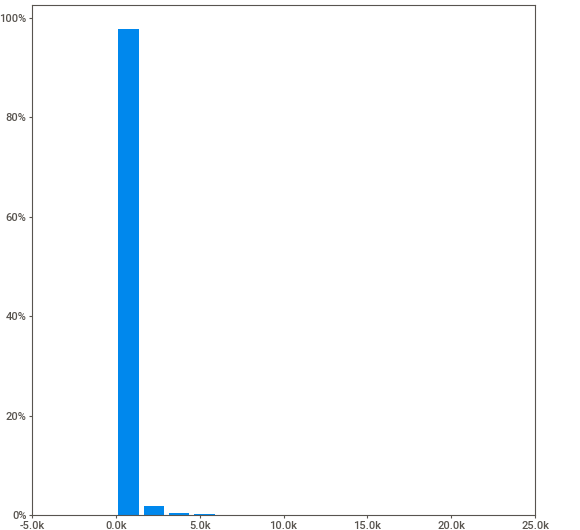
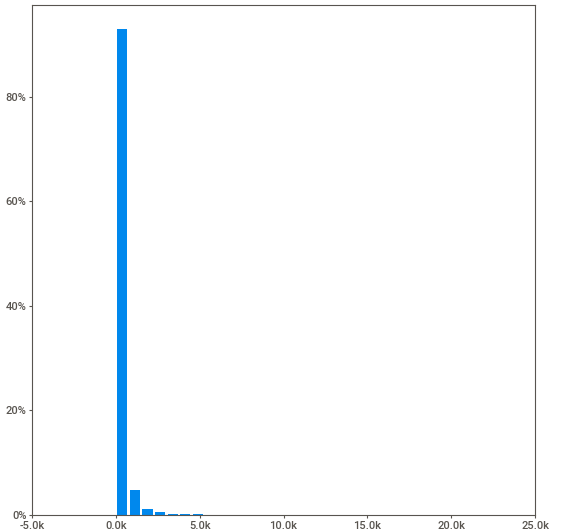
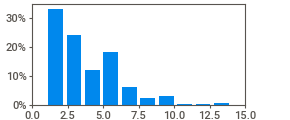
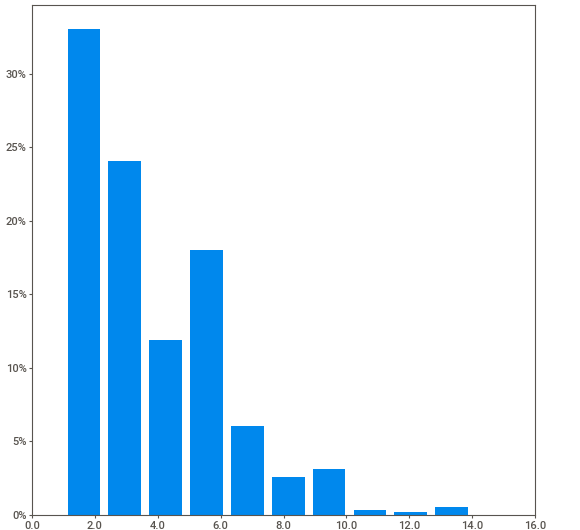
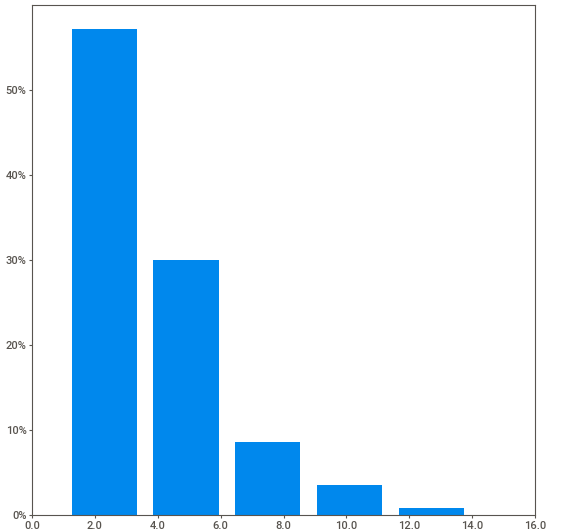
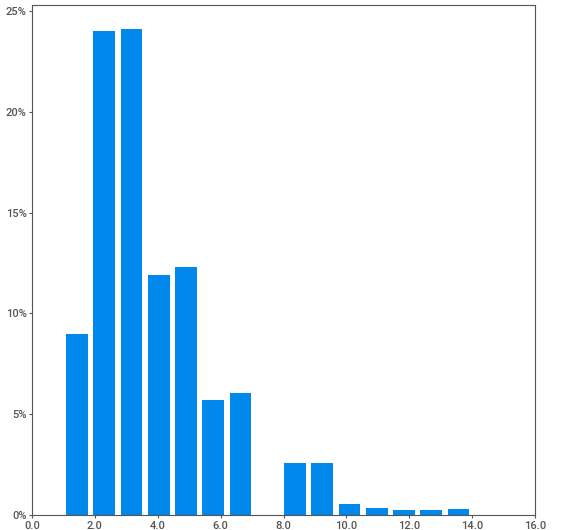
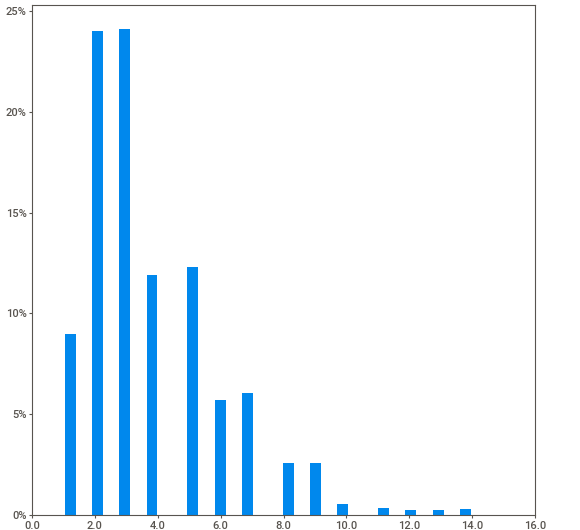
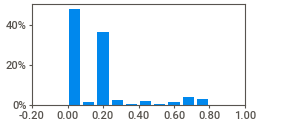
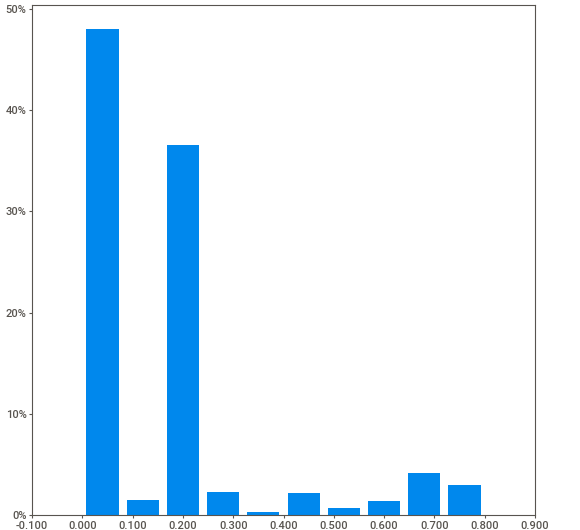
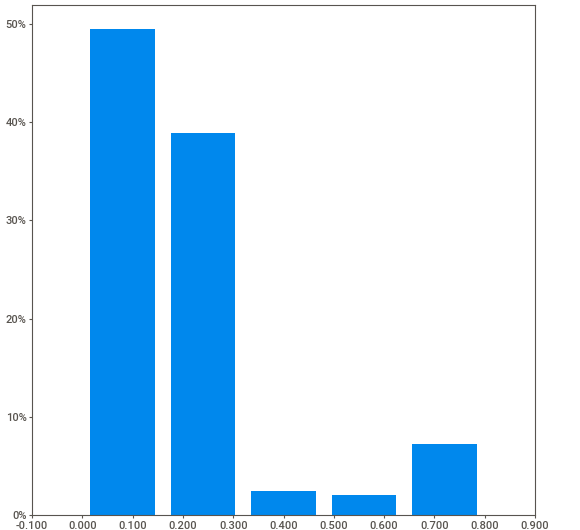
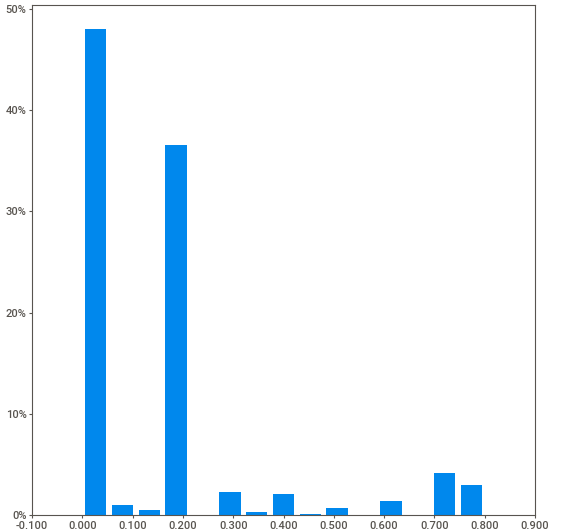
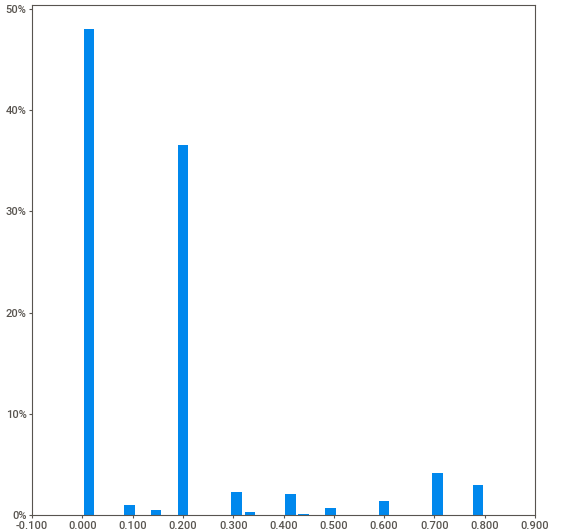
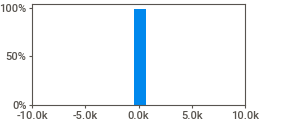
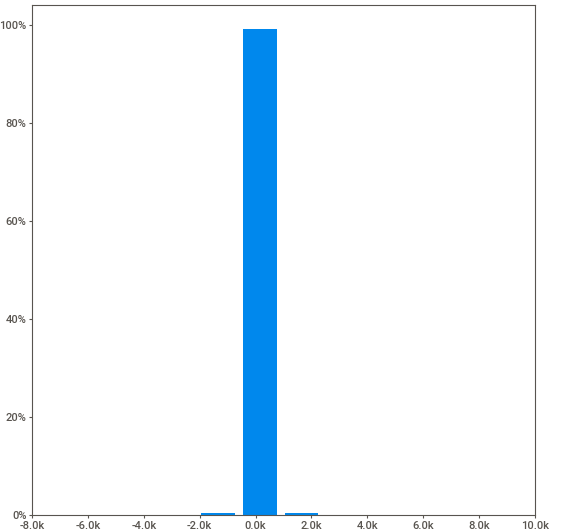
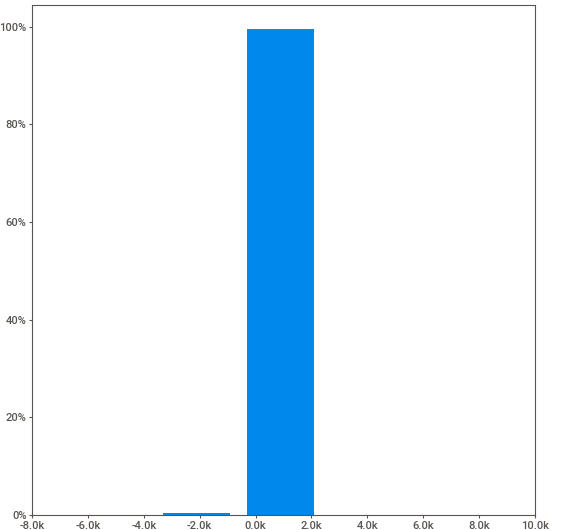
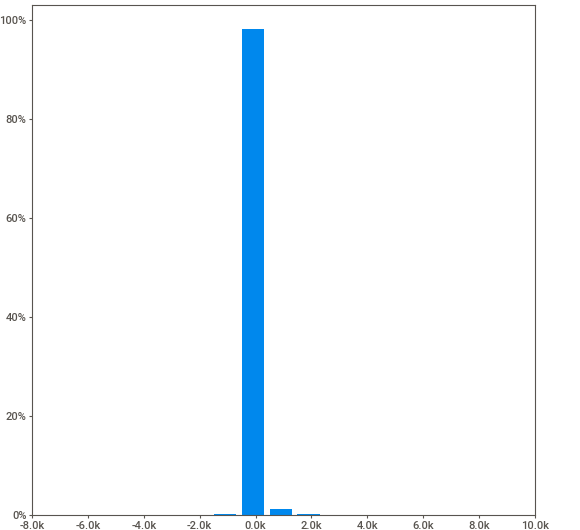
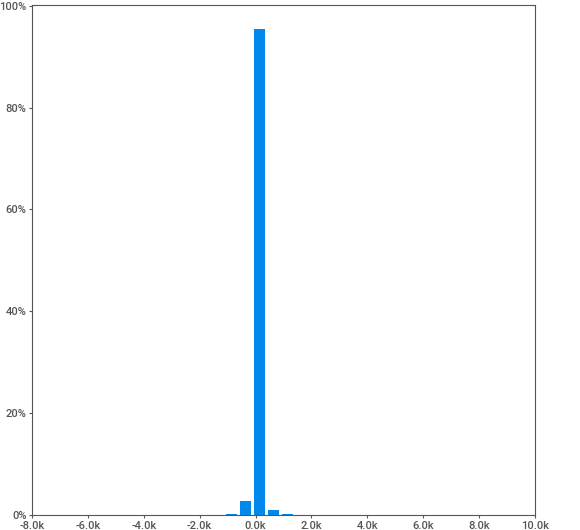
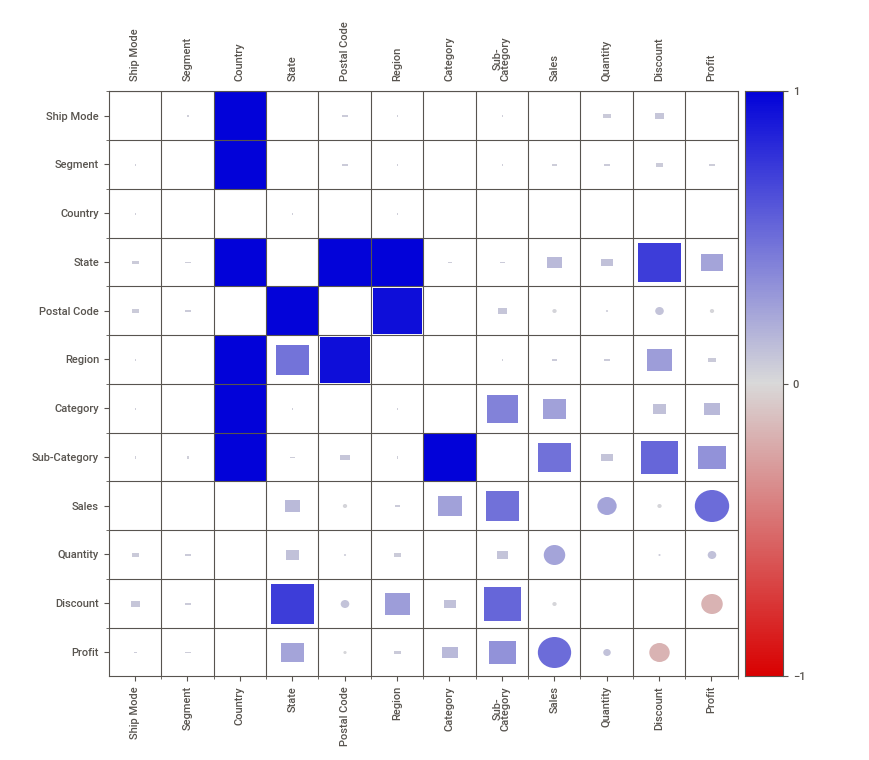
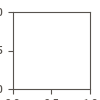

In [18]:
import sweetviz
df = pd.read_csv('SampleSuperstore.csv')
autoEDA = sweetviz.analyze(df)
autoEDA.show_notebook()

### Bespoke EDA 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('SampleSuperstore.csv')

In [4]:
# Display the first few rows of the dataset
print(df.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

In [5]:
# Check the summary statistics of numerical columns
print(df.describe())

        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


In [6]:
# Check the data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None


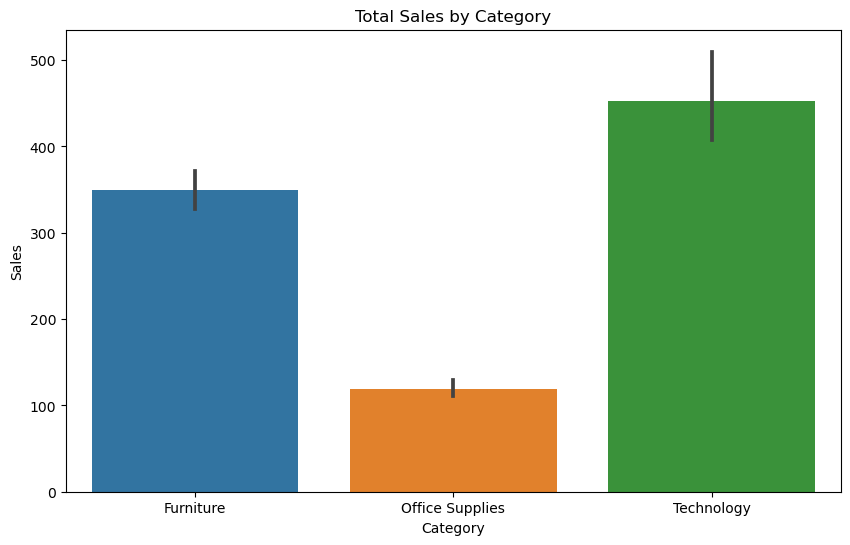

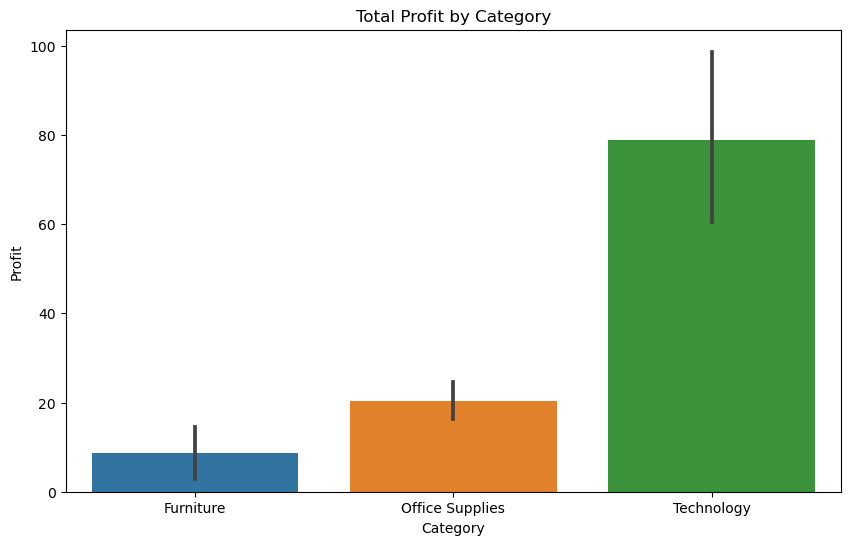

In [7]:
# Calculate total sales and profit
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

# Calculate profit margin
df['Profit Margin'] = df['Profit'] / df['Sales']

# Visualize sales and profit
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=df)
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

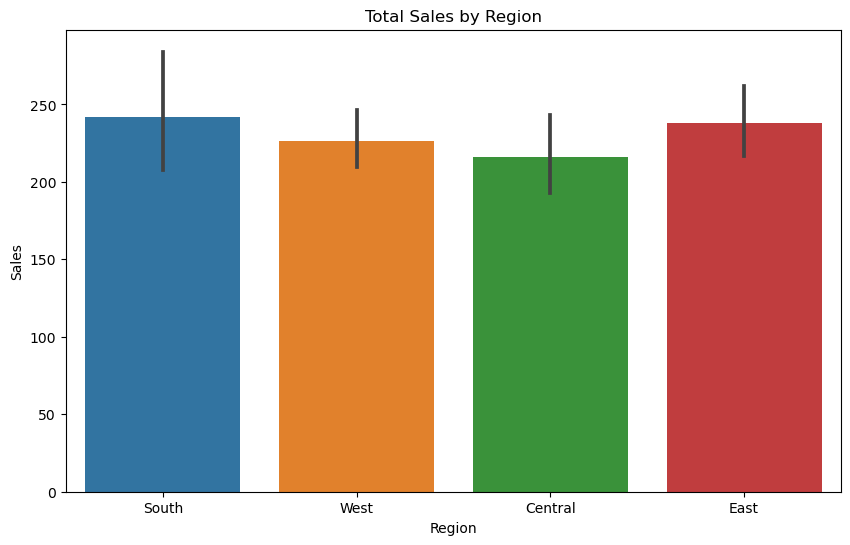

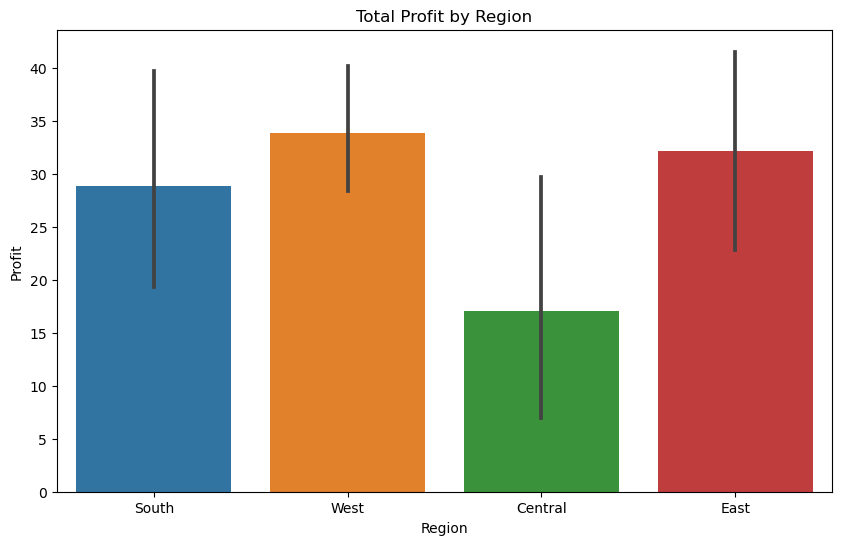

In [8]:
#Identify weak areas:

# Analyze sales and profit by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=df)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=df)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

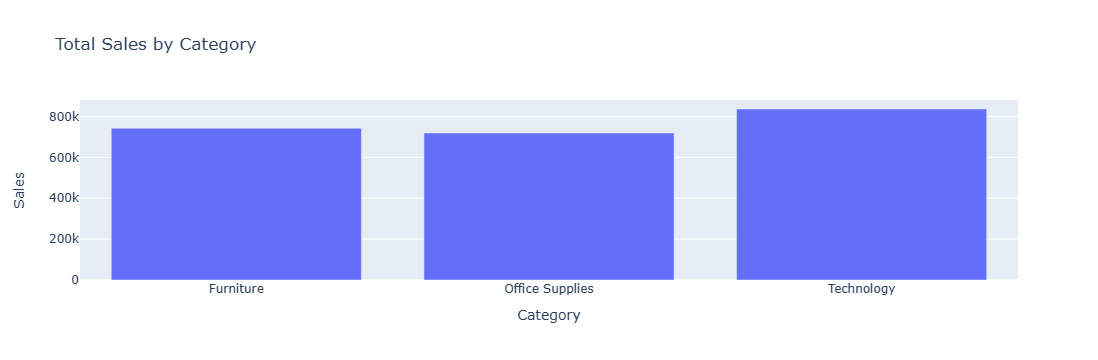

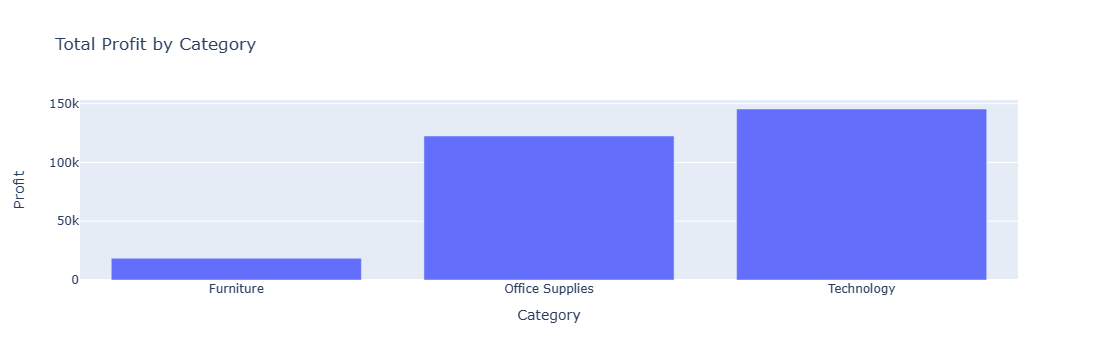

In [9]:
import plotly.graph_objects as go

# Create a bar chart for sales by category
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
fig1 = go.Figure(data=[go.Bar(x=sales_by_category['Category'], y=sales_by_category['Sales'])])
fig1.update_layout(title='Total Sales by Category', xaxis_title='Category', yaxis_title='Sales')

# Create a bar chart for profit by category
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()
fig2 = go.Figure(data=[go.Bar(x=profit_by_category['Category'], y=profit_by_category['Profit'])])
fig2.update_layout(title='Total Profit by Category', xaxis_title='Category', yaxis_title='Profit')

# Display the dashboard
fig1.show()
fig2.show()

### business problems that can be derived by exploring the data

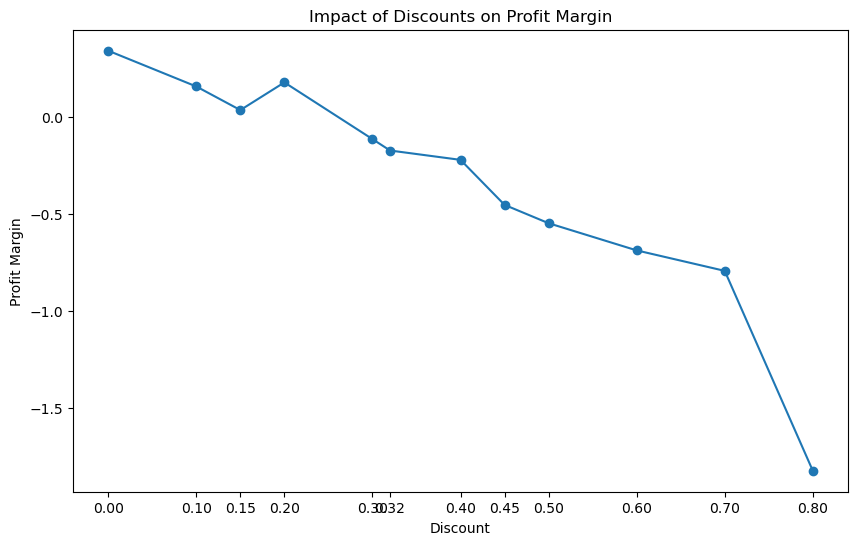

In [10]:
# analyzing the impact of discounts on profitability.

# Calculate profit margin
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by discount and calculate average profit margin
discount_profit_margin = df.groupby('Discount')['Profit Margin'].mean().reset_index()

# Visualize the relationship between discount and profit margin
plt.figure(figsize=(10, 6))
plt.plot(discount_profit_margin['Discount'], discount_profit_margin['Profit Margin'], marker='o')
plt.title('Impact of Discounts on Profit Margin')
plt.xlabel('Discount')
plt.ylabel('Profit Margin')
plt.xticks(discount_profit_margin['Discount'])
plt.show()

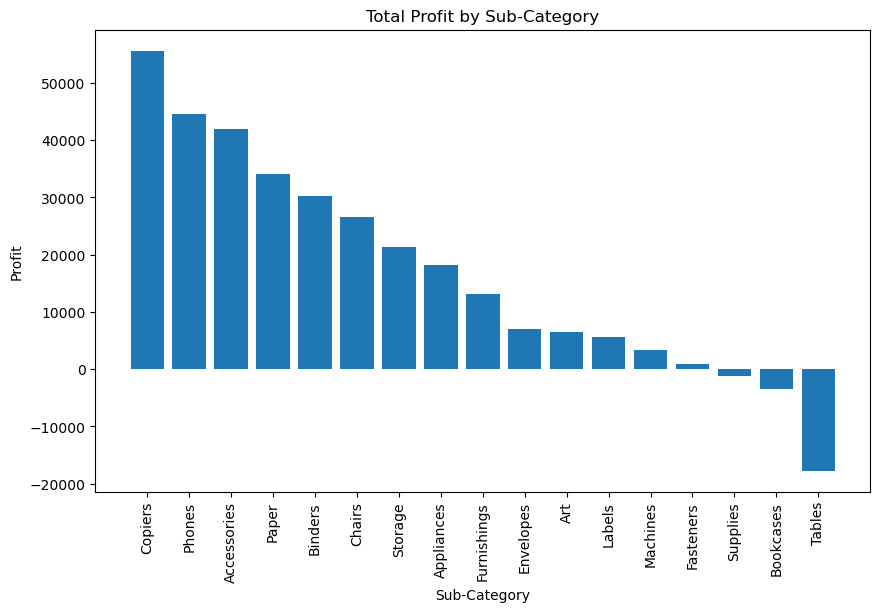

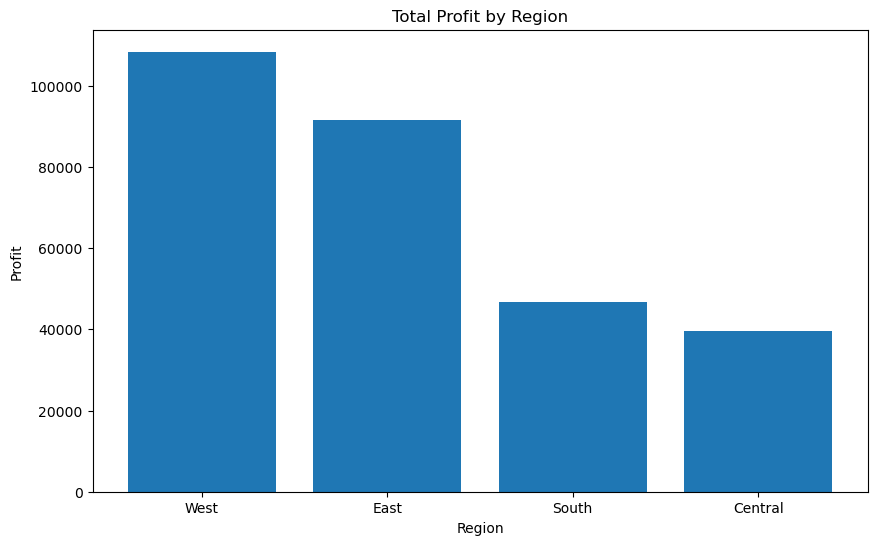

In [11]:
# Identifying the most profitable sub-categories and regions

# Calculate total profit by sub-category
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index()

# Sort sub-categories by profit in descending order
subcat_profit_sorted = subcat_profit.sort_values('Profit', ascending=False)

# Visualize the most profitable sub-categories
plt.figure(figsize=(10, 6))
plt.bar(subcat_profit_sorted['Sub-Category'], subcat_profit_sorted['Profit'])
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.show()

# Calculate total profit by region
region_profit = df.groupby('Region')['Profit'].sum().reset_index()

# Sort regions by profit in descending order
region_profit_sorted = region_profit.sort_values('Profit', ascending=False)

# Visualize the most profitable regions
plt.figure(figsize=(10, 6))
plt.bar(region_profit_sorted['Region'], region_profit_sorted['Profit'])
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

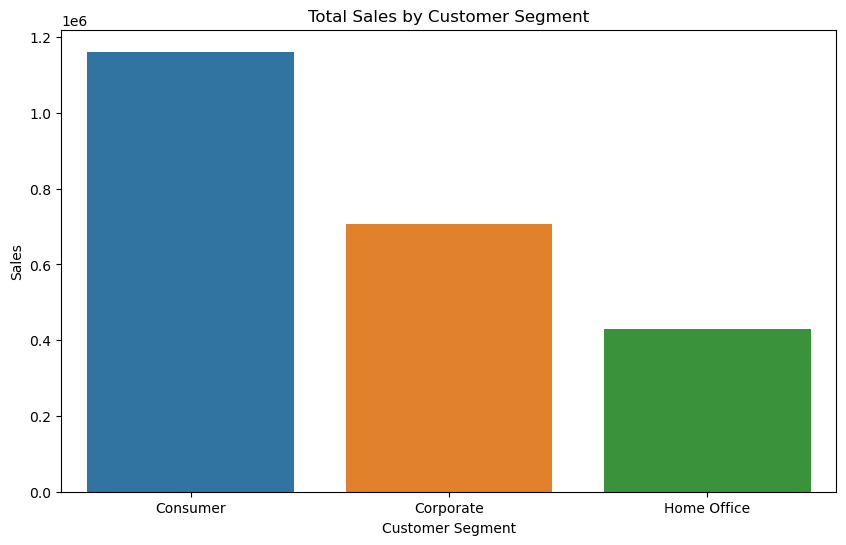

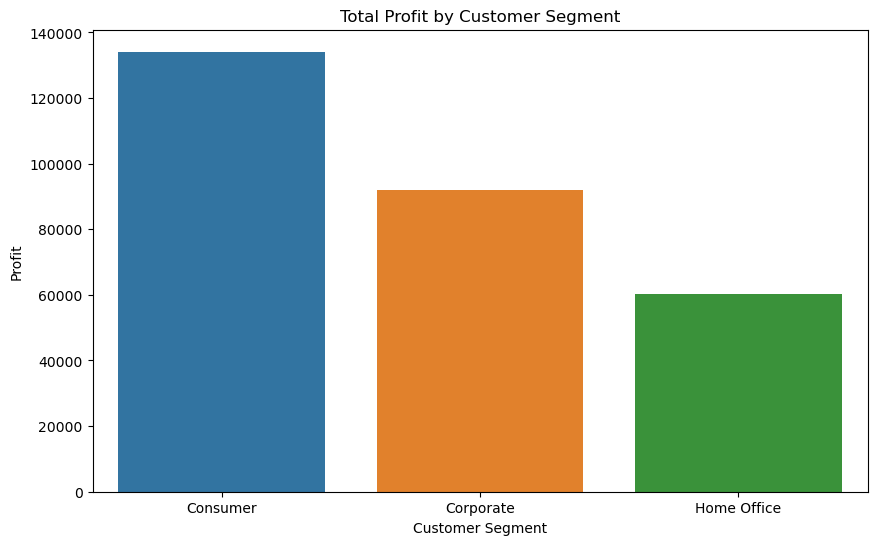

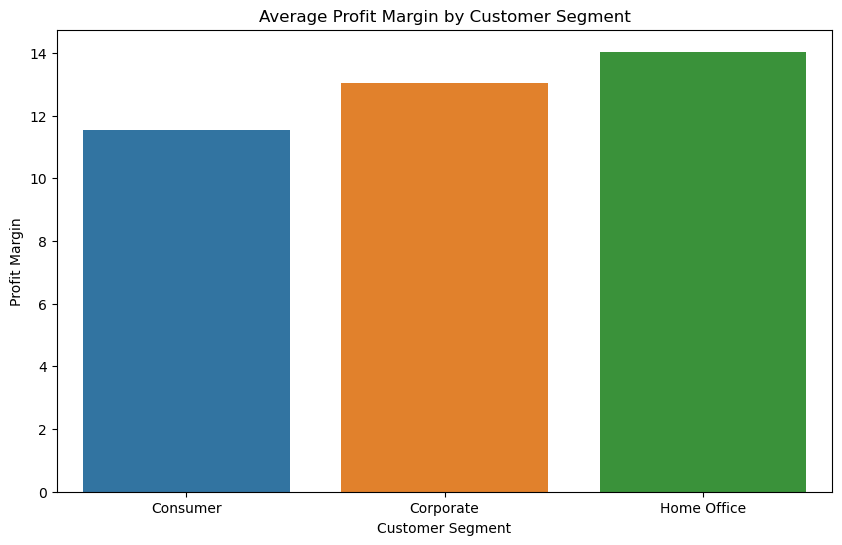

In [15]:
# Analyzing the purchasing behavior and profitability of different customer segments

# Calculate total sales and profit by customer segment
segment_sales_profit = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

# Calculate average profit margin by customer segment
segment_sales_profit['Profit Margin'] = (segment_sales_profit['Profit'] / segment_sales_profit['Sales']) * 100

# Visualize the sales and profit for each customer segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=segment_sales_profit)
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Profit', data=segment_sales_profit)
plt.title('Total Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Profit')
plt.show()

# Visualize the average profit margin for each customer segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Profit Margin', data=segment_sales_profit)
plt.title('Average Profit Margin by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Profit Margin')
plt.show()